## keras-ocr

In [2]:
import keras_ocr
from matplotlib import pyplot as plt

Keras has an inbuilt pipeline. Image URL can be given as input for further processing.


In [3]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\Wangjun\.keras-ocr\craft_mlt_25k.h5

Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.

Looking for C:\Users\Wangjun\.keras-ocr\crnn_kurapan.h5


**Note: the image dataset may need to extract data one by one otherwise the laptop may crush or jupyterlab's kernal may interrupt.**

In [4]:
images = [
    keras_ocr.tools.read(url) for url in[
'https://raw.githubusercontent.com/Thangasami/OCR-/main/number/1.jpg',
'https://raw.githubusercontent.com/Thangasami/OCR-/main/number/2.jpg',
'https://raw.githubusercontent.com/Thangasami/OCR-/main/number/3.jpg',
'https://raw.githubusercontent.com/Thangasami/OCR-/main/number/4.jpg',
'https://raw.githubusercontent.com/Thangasami/OCR-/main/number/5.jpg'
# 'https://raw.githubusercontent.com/Thangasami/OCR-/main/number/6.jpg',
# 'https://raw.githubusercontent.com/Thangasami/OCR-/main/number/7.jpg',
# 'https://raw.githubusercontent.com/Thangasami/OCR-/main/number/8.jpg',
# 'https://raw.githubusercontent.com/Thangasami/OCR-/main/number/9.jpg',
# 'https://raw.githubusercontent.com/Thangasami/OCR-/main/number/10.jpg'
    ]
]

Now, do the prediction:

In [5]:
prediction_groups = pipeline.recognize(images)

1/1 [==============================] - 3s 3s/step


check the result:

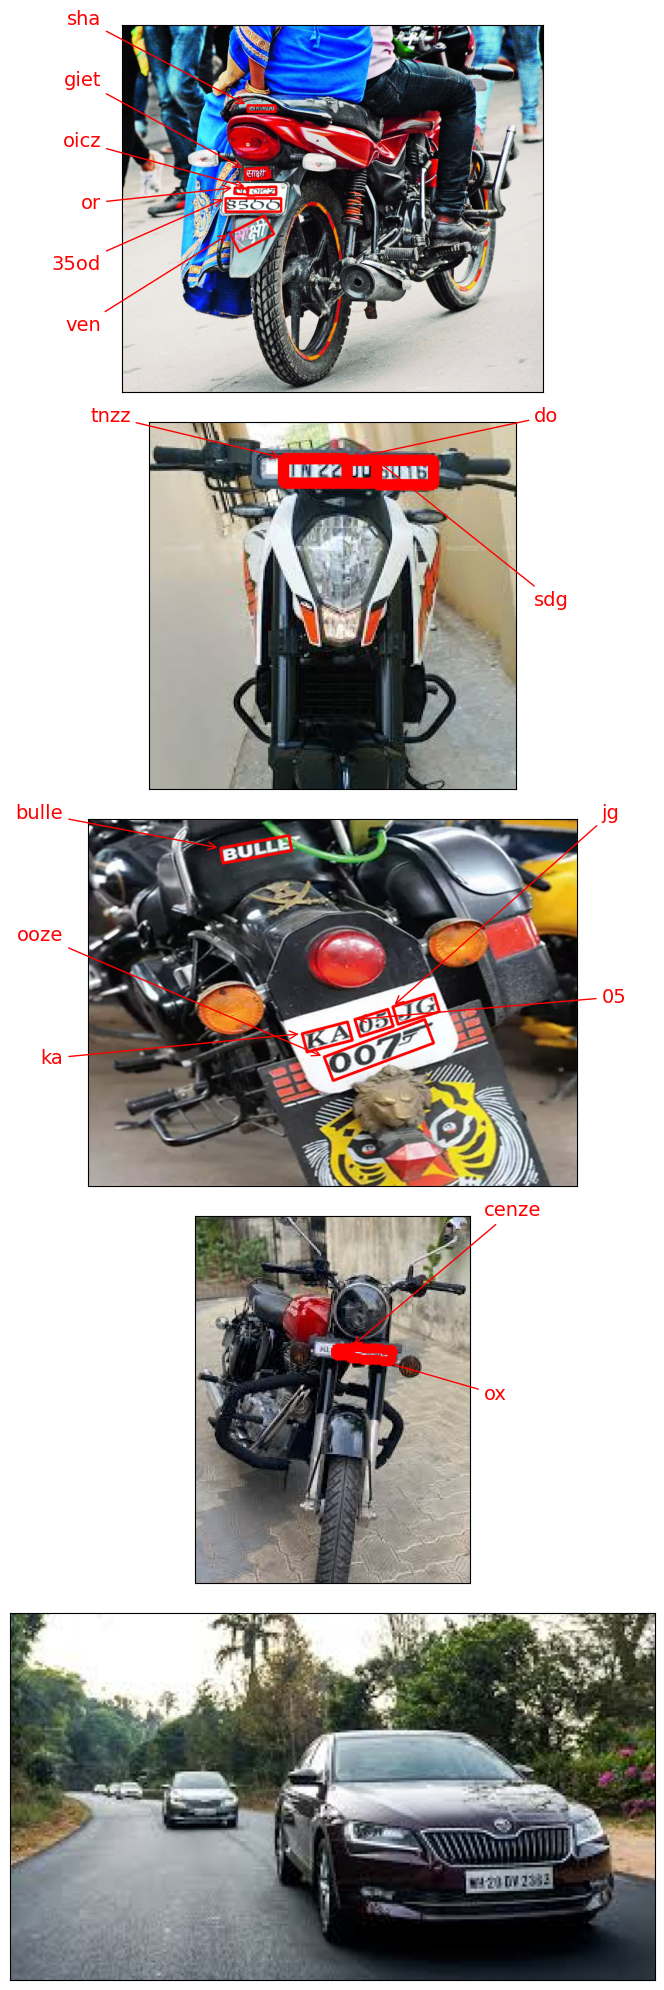

In [8]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
if len(images) == 1:
    axs = [axs]

for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

plt.tight_layout()
plt.show()

## Tesseract

Now test Tesseract 

In [27]:
import pytesseract

In [36]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [29]:
import cv2

Using single line of code:

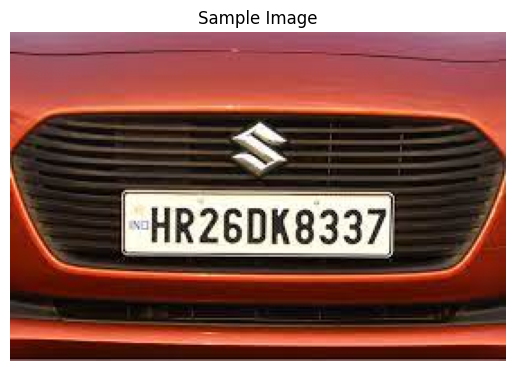

In [32]:
img1 = cv2.imread('8.jpg')

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img1_rgb)
plt.title('Sample Image')
plt.axis('off') # Hide axis to focus on the image
plt.show()

In [37]:
text1 = pytesseract.image_to_string(img1)

In [38]:
print(text1)

eS
\ — ——
= HR260K8337/m F



## EasyOCR

In [1]:
import easyocr

In [2]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [3]:
import PIL
from PIL import ImageDraw

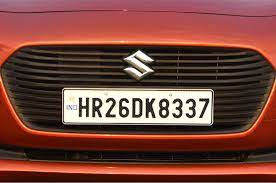

In [4]:
img = PIL.Image.open('8.jpg')
img

In [5]:
bound = reader.readtext('8.jpg')
bound

[([[72, 92], [214, 92], [214, 124], [72, 124]],
  'HRZ6DK8337',
  0.4664303067531016)]

## Performance Comparision and Conlusion

Result of different OCR libraries for Images dataset:

| Type | Actual Value | Tesseract Prediction | Keras-OCR Prediction | EasyOCR Prediction |
| --- | --- | --- | --- | --- |
| Number Plate High Quality | HR26DK8337 | HR260K8337 | HR26DK8337 | HR26DK8337 |
| Number Plate Low Quality | MH14GN9239 | Spaces | MHL4GH9239 | 9239 |
| Handwritten Low Quality | AMIT ASHISH | Spaces | ADIT ASHISH | AdIT ASHISH |
| Handwritten High Quality | LAKSHMINIVAS TOURIST HOME | LAKSHMINIVAS TOURIST HOME | LAKSHMINIVAS TOURIST HOM | LAKSHMINIVAS TOURIST HOME |
| Image with text High Quality | Albert Einstein | Albert Einstein | Albert Einstein | Al ber t Einstein |
| Image with text Low Quality | Kotak Mahindra Bank | Kotak Mahindra Bank | Kotak Mahindra Bank | Kotak Mahindra Bank |
| Reciept High Quality | Order #19866 | Order #19866 | Order #119666 | Order #19866 |
| Reciept Low Quality | Amoxicillin 500mg | Spaces | Amoxicillin 500mg | Amoxicillin 500mg |

The efficacy of Optical Character Recognition (OCR) is not solely contingent upon the underlying model but also hinges on a multitude of ancillary factors. These include the clarity of the image, its conversion to grayscale, the optimization of hyperparameters, and the allocation of weights within the model's architecture. Such variables play a pivotal role in determining the accuracy of OCR predictions, underscoring the complexity of the OCR process beyond the model's algorithmic capabilities.

Among the plethora of OCR tools, Tesseract stands out for its proficiency with high-resolution images, and its performance can be further augmented through morphological operations like dilation, erosion, and OTSU binarization. EasyOCR, distinguished by its lightweight design, excels in the conversion of receipts and PDFs into editable formats, delivering exceptional accuracy with texts that are neatly organized. In contrast, Keras-OCR is specifically engineered for images that contain text in various fonts and colors, arranged without uniformity. This tool demonstrates its robustness in extracting text from such complex imagery, highlighting the specialized nature of OCR solutions in handling diverse text presentations within images.